<a href="https://colab.research.google.com/github/SoonchanGwon/ForMANGA/blob/master/%EC%86%90%EA%B8%80%EC%94%A8%EC%9D%B8%EC%8B%9D(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


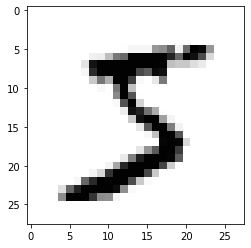

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [3]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
import sys
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(X_train[0], cmap='Greys')
plt.show()

################################

# 0번째 원소의 모든 데이터를 출력
for x in X_train[0]:
    for i in x:
      sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

In [4]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# 필요 라이브러리 호출
import numpy
import tensorflow as tf

# 데이터 셋 호출
from keras.datasets import mnist

# 실행 시마다 같은 결과값 도출을 위한 시드 설정
numpy.random.seed(0)
tf.random.set_seed(0)

# 데이터를 불러와서 각 변수에 저장
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 학습에 적합한 형태로 데이터 가공
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 클래스를 학습에 이용하기 위해 데이터 가공
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 categorical_crossentropy, 옵티마이저는 adam 설정)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 모델 실행(X_test, Y_test로 검증, 200개씩 30번 학습)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=2)

# 학습 정확도, 검증 정확도 출력
print('\nAccuracy: {:.4f}'.format(model.evaluate(X_train, Y_train)[1]))
print('\nVal_Accuracy: {:.4f}'.format(model.evaluate(X_test, Y_test)[1]))

# 모델 저장
model.save('Predict_Model.h5')

Epoch 1/30
300/300 - 4s - loss: 0.3043 - accuracy: 0.9152 - val_loss: 0.1530 - val_accuracy: 0.9575
Epoch 2/30
300/300 - 3s - loss: 0.1263 - accuracy: 0.9635 - val_loss: 0.1056 - val_accuracy: 0.9684
Epoch 3/30
300/300 - 3s - loss: 0.0827 - accuracy: 0.9760 - val_loss: 0.0816 - val_accuracy: 0.9750
Epoch 4/30
300/300 - 3s - loss: 0.0598 - accuracy: 0.9823 - val_loss: 0.0758 - val_accuracy: 0.9767
Epoch 5/30
300/300 - 3s - loss: 0.0464 - accuracy: 0.9866 - val_loss: 0.0684 - val_accuracy: 0.9798
Epoch 6/30
300/300 - 3s - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.0681 - val_accuracy: 0.9783
Epoch 7/30
300/300 - 3s - loss: 0.0263 - accuracy: 0.9934 - val_loss: 0.0617 - val_accuracy: 0.9815
Epoch 8/30
300/300 - 3s - loss: 0.0206 - accuracy: 0.9949 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch 9/30
300/300 - 3s - loss: 0.0148 - accuracy: 0.9968 - val_loss: 0.0600 - val_accuracy: 0.9824
Epoch 10/30
300/300 - 3s - loss: 0.0127 - accuracy: 0.9974 - val_loss: 0.0639 - val_accuracy: 0.9814

# 테스트
* 테스트를 위해서 28*28 사이즈를 그림판으로 그려서 업로드하기 

In [7]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
from keras.utils import np_utils

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# test.png는 그림판에서 붓으로 숫자 8을 그린 이미지 파일
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("test.png").convert("L")

# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1

# 모델 불러오기
model = load_model('Predict_Model.h5')

# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
res = model.predict_classes(test_data)

print(res)

[2]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
